# CSC426 Deep Learning Homework Assignment 4
using RNNs to predict Google Stock Data

{Good news, this is the last homework of this course.}

##### At this moment, you should have the ability to build a Deep Learning project on your own following the Data (load and preprocessing), Model, evaluate framework. The requirements of this project are:
1. This Assignment asks you to predict the stock information from 2017-01-03 to 2017-12-29
    - pay attention to the train and test split process.
    - you need to follow the train-test-split requirment in this home work

2. The lowest MSE result among the whole class will get 10 bonus points (with the correct build model)
    - so get the best model and report the MSE on the test set
    

# The dataset information
GOOGL_2006-01-01_to_2018-01-01.csv
The file contains 13 years of stock data (in the allstocks2006-01-01to2018-01-01.csv and corresponding folder)

The file has the following columns:
- Date - in format: yy-mm-dd
- Open - price of the stock at market open (this is NYSE data so all in USD)
- High - Highest price reached in the day
- Low Close - Lowest price reached in the day
- Volume - Number of shares traded
- Name - the stock's ticker name -- you may delete this one in your work

More information about the data can be found here https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231#GOOGL_2006-01-01_to_2018-01-01.csv

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
import tensorflow as tf

In [7]:
#un-comment the code if upload is necessary
from google.colab import files
uploaded = files.upload()

Saving GOOGL_2006-01-01_to_2018-01-01.csv to GOOGL_2006-01-01_to_2018-01-01.csv


# Read data

Note that,
- you need to use parse_dates and set_index() to use date column as your time-stamp to organize your data frame
- you need to observe your data to remove unnecessary column like "Name"

In [8]:
df = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [9]:
# drop unnecessary column and # set date as indx
df.set_index('Date', inplace=True)
df = df.drop('Name', axis=1)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450
2006-01-04,222.17,224.70,220.09,222.84,15292353
2006-01-05,223.22,226.00,220.97,225.85,10815661
2006-01-06,228.66,235.49,226.85,233.06,17759521
2006-01-09,233.44,236.94,230.70,233.68,12795837


In [10]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

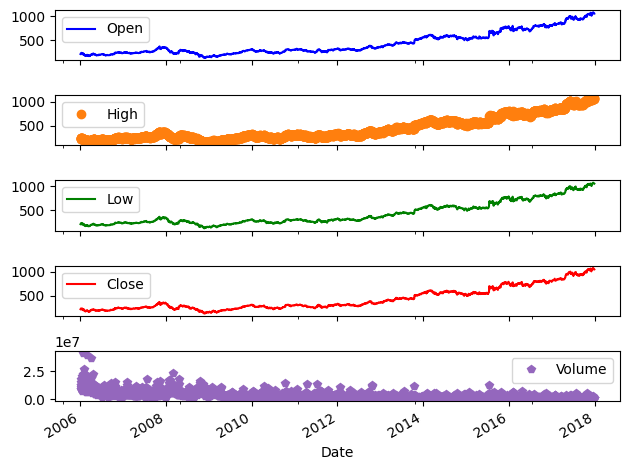

In [11]:
# Visualize the data using df.plot(), plt.tigh_layout()
df.plot(kind='line', subplots=True,
    layout=(5, 1), legend=True,
    style=['b', 'o', 'g', 'r', 'p'])
plt.tight_layout()
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 141.5 KB


In [13]:
df.nunique()

Open      2880
High      2855
Low       2875
Close     2919
Volume    3019
dtype: int64

# Train and test split
Let's imagine we want to use predict 1 years into the future.
That means, we split the data based on the index column "Date", any date before 2017 will be included in the training set; any data marked with Date=2017 will be in the test set.
Please refer to the page https://pandas.pydata.org/pandas-docs/version/0.15.0/indexing.html and "Slicing ranges" section to learn how to do it.

In [14]:
train = df[:'2017-01-02']
test  = df['2017-01-03':]

In [15]:
train

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450
2006-01-04,222.17,224.70,220.09,222.84,15292353
2006-01-05,223.22,226.00,220.97,225.85,10815661
2006-01-06,228.66,235.49,226.85,233.06,17759521
2006-01-09,233.44,236.94,230.70,233.68,12795837
...,...,...,...,...,...
2016-12-23,808.01,810.97,805.11,807.80,765537
2016-12-27,808.68,816.00,805.80,809.93,975962
2016-12-28,813.33,813.33,802.44,804.57,1214756


In [16]:
test

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,800.62,811.44,796.89,808.01,1959033
2017-01-04,809.89,813.43,804.11,807.77,1515339
2017-01-05,807.50,813.74,805.92,813.02,1340535
2017-01-06,814.99,828.96,811.50,825.21,2017097
2017-01-09,826.37,830.43,821.62,827.18,1408924
...,...,...,...,...,...
2017-12-22,1070.00,1071.72,1067.64,1068.86,889446
2017-12-26,1068.64,1068.86,1058.64,1065.85,918767
2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203


<Axes: xlabel='Date'>

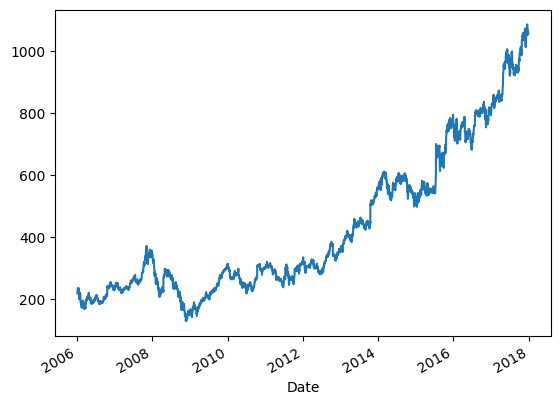

In [17]:
# Visualize the Google's daily closing price
df.Close.plot()

<Axes: xlabel='Date'>

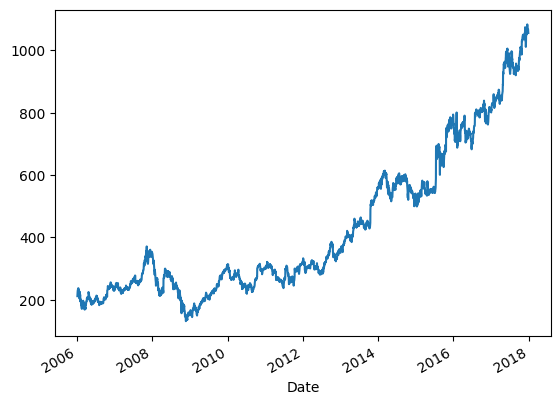

In [18]:
# Visualize the Google's daily openning price
df.Open.plot()

# Scale data

In [19]:
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator
This method takes in a sequence of data-points gathered at equal intervals, along with time series parameters to produce batches for training/validation.

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [128]:
seq_length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train,
                                scaled_train,
                                length=seq_length,
                                batch_size = batch_size)

In [23]:
len(scaled_train)

2768

In [24]:
len(generator)

2718

In [25]:
generator[0]

(array([[[0.11324971, 0.11819421, 0.12130106, 0.12587531, 0.31027463],
         [0.12838172, 0.12763782, 0.13657181, 0.1329627 , 0.36327046],
         [0.12986664, 0.12948394, 0.13781956, 0.13722078, 0.25317456],
         [0.13755993, 0.14296061, 0.14615679, 0.14742039, 0.42394587],
         [0.14431984, 0.14501974, 0.15161569, 0.14829747, 0.3018733 ],
         [0.14290563, 0.14277599, 0.15239554, 0.15032042, 0.21109712],
         [0.14775636, 0.14622682, 0.15745743, 0.15165019, 0.20873483],
         [0.14949584, 0.14614161, 0.1520127 , 0.1459916 , 0.23619425],
         [0.14283492, 0.14039024, 0.15209778, 0.14784478, 0.17557236],
         [0.14194397, 0.14252038, 0.15275001, 0.14845308, 0.19217469],
         [0.13078587, 0.1336164 , 0.13906731, 0.13273635, 0.4916177 ],
         [0.13352944, 0.13086143, 0.1317935 , 0.12673825, 0.34476356],
         [0.12470478, 0.12130421, 0.10464078, 0.10055313, 1.        ],
         [0.10253002, 0.11302508, 0.11243921, 0.12040063, 0.54712188],
      

In [100]:
scaled_train

array([[0.11324971, 0.11819421, 0.12130106, 0.12587531, 0.31027463],
       [0.12838172, 0.12763782, 0.13657181, 0.1329627 , 0.36327046],
       [0.12986664, 0.12948394, 0.13781956, 0.13722078, 0.25317456],
       ...,
       [0.96440441, 0.96354625, 0.96228395, 0.95590544, 0.01705817],
       [0.94884813, 0.95278196, 0.95618699, 0.95351469, 0.0131881 ],
       [0.95009263, 0.94927433, 0.94410651, 0.93875992, 0.02987422]])

# Model

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

### Model 1 baseline model

In [156]:
baseline_model = Sequential()

baseline_model.add(Dense(10, input_shape=(seq_length, 5)))

baseline_model.add(Dense(5))

baseline_model.compile(optimizer = 'adam', loss='mse')

In [157]:
baseline_model.fit(generator, epochs=10)

Epoch 1/10
2718/2718 [==============================] - 8s 2ms/step - loss: 0.0096
Epoch 2/10
2718/2718 [==============================] - 7s 3ms/step - loss: 0.0023
Epoch 3/10
2718/2718 [==============================] - 7s 3ms/step - loss: 0.0023
Epoch 4/10
2718/2718 [==============================] - 9s 3ms/step - loss: 0.0023
Epoch 5/10
2718/2718 [==============================] - 7s 3ms/step - loss: 0.0023
Epoch 6/10
2718/2718 [==============================] - 8s 3ms/step - loss: 0.0023
Epoch 7/10
2718/2718 [==============================] - 6s 2ms/step - loss: 0.0023
Epoch 8/10
2718/2718 [==============================] - 8s 3ms/step - loss: 0.0023
Epoch 9/10
2718/2718 [==============================] - 7s 3ms/step - loss: 0.0023
Epoch 10/10
2718/2718 [==============================] - 7s 3ms/step - loss: 0.0023


##### Visualize train performance

<Axes: >

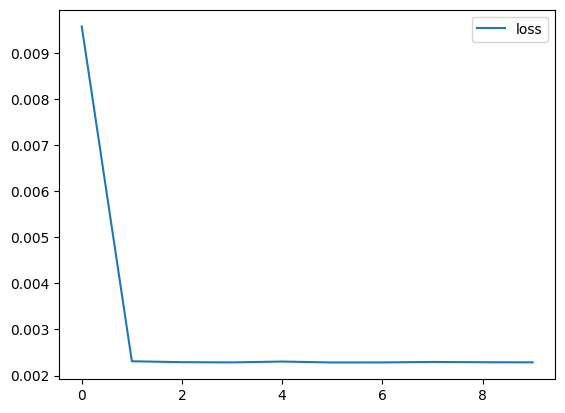

In [158]:
baseline_losses = pd.DataFrame(baseline_model.history.history)
baseline_losses.plot()

##### Save the model

In [159]:
from tensorflow.keras.models import load_model
from google.colab import drive
drive.mount('/content/gdrive')
baseline_model.save('/content/gdrive/My Drive/baseline.pt')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##### Test the model by predict the value on the last training sample

In [160]:
# Test the model by evaluating first batch
first_eval_batch = scaled_train[-seq_length:]
first_eval_batch = first_eval_batch.reshape((1, seq_length, 5))
pred_test_0 = baseline_model.predict(first_eval_batch)
pred_test_0

1/1 [==============================] - 0s 94ms/step


array([[[0.96075904, 0.96649146, 0.96219635, 0.9718524 , 0.01025177],
        [0.9573439 , 0.96487504, 0.95336956, 0.97317195, 0.01309259],
        [0.9733999 , 0.9813156 , 0.9685467 , 0.9901861 , 0.0113879 ],
        [0.97111505, 0.9749112 , 0.97568077, 0.97811496, 0.01356276],
        [0.95902336, 0.96342826, 0.96118975, 0.9680128 , 0.01363222],
        [0.9527083 , 0.958246  , 0.95379955, 0.9631207 , 0.02433985],
        [0.95837027, 0.96277046, 0.9618705 , 0.96573603, 0.03629012],
        [0.947355  , 0.9504994 , 0.9533026 , 0.95286214, 0.01774847],
        [0.93640745, 0.9399631 , 0.93923503, 0.9439665 , 0.01989075],
        [0.92152935, 0.9217138 , 0.9321474 , 0.9213262 , 0.01977407],
        [0.90484744, 0.91034335, 0.90474284, 0.9163896 , 0.0205827 ],
        [0.89846975, 0.9056368 , 0.892282  , 0.91528785, 0.02126643],
        [0.9262373 , 0.9332248 , 0.921373  , 0.9419316 , 0.01883095],
        [0.9388667 , 0.9457763 , 0.9330486 , 0.95505464, 0.01691559],
        [0.9303439 ,

compare the first batch predicted result with the test_scaled, you can have a roughly idea about the model's performance.

In [161]:
scaled_test[0]

array([0.94642983, 0.96086228, 0.95441462, 0.96077183, 0.03536228])

##### Predict 1-year stock price

In [163]:
# evaluate all year 2017's result using a function
test_predictions = []

baseline_eval_batch = scaled_train[-seq_length:]
current_batch = baseline_eval_batch.reshape((1, seq_length, 5))

for i in range(len(test)):
    current_pred = baseline_model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    #current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 24ms/step


In [168]:
# performance on MSE, MAE related to the baseline model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("MSE: ", mean_squared_error(scaled_test[0], test_predictions[0][0]))
print("MAE: ", mean_absolute_error(scaled_test[0], test_predictions[0][0]))

MSE:  0.00021017727624435888
MAE:  0.0127862437952323


### Model 2: SimpleRNN
'''Try to get the best performance using simple RNN layers'''

In [116]:
SimpleRNN_model = Sequential()

SimpleRNN_model.add(SimpleRNN(50, input_shape=(seq_length, 5)))

SimpleRNN_model.add(Dense(5))

SimpleRNN_model.compile(optimizer = 'adam', loss='mse')

In [117]:
SimpleRNN_model.fit(generator, epochs=10)

Epoch 1/10
2718/2718 [==============================] - 29s 10ms/step - loss: 0.0034
Epoch 2/10
2718/2718 [==============================] - 27s 10ms/step - loss: 6.4186e-04
Epoch 3/10
2718/2718 [==============================] - 28s 10ms/step - loss: 5.5679e-04
Epoch 4/10
2718/2718 [==============================] - 26s 10ms/step - loss: 5.4026e-04
Epoch 5/10
2718/2718 [==============================] - 24s 9ms/step - loss: 5.1314e-04
Epoch 6/10
2718/2718 [==============================] - 22s 8ms/step - loss: 4.8467e-04
Epoch 7/10
2718/2718 [==============================] - 27s 10ms/step - loss: 4.8709e-04
Epoch 8/10
2718/2718 [==============================] - 27s 10ms/step - loss: 4.6368e-04
Epoch 9/10
2718/2718 [==============================] - 23s 9ms/step - loss: 4.7274e-04
Epoch 10/10
2718/2718 [==============================] - 23s 9ms/step - loss: 4.5138e-04


##### Visualize train performance

<Axes: >

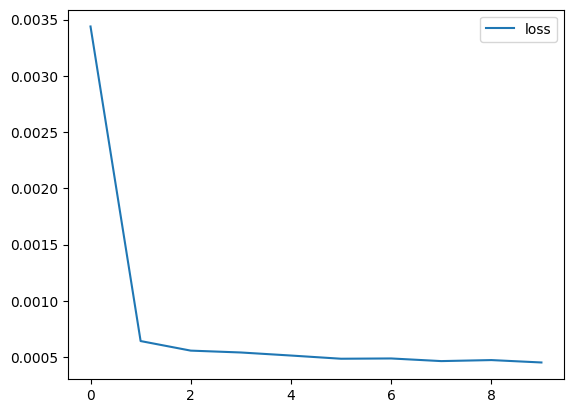

In [118]:
SimpleRNN_losses = pd.DataFrame(SimpleRNN_model.history.history)
SimpleRNN_losses.plot()

##### Save the model

In [119]:
# save your model
SimpleRNN_model.save('/content/gdrive/My Drive/SimpleRNN.pt')

##### Predict 1-year stock price

In [148]:
test_predictions = []

RNN_eval_batch = scaled_train[-seq_length:]
current_batch = RNN_eval_batch.reshape((1, seq_length, 5))

for i in range(len(test)):
    current_pred = SimpleRNN_model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 37ms/step


In [149]:
# check MSE, MAE on current models
print("MSE: ", mean_squared_error(scaled_test, test_predictions))
print("MAE: ", mean_absolute_error(scaled_test, test_predictions))

MSE:  0.7043660956178958
MAE:  0.7057666548149858


### Model 3: LSTM

'''Try to get the best performance using LSTM layers'''


In [45]:
'''Try to get the best performance using LSTM layers'''
lstm_model = Sequential()

lstm_model.add(LSTM(30, input_shape=(seq_length, 5)))

lstm_model.add(Dense(5))

lstm_model.compile(optimizer = 'adam', loss='mse')

In [46]:
lstm_model.fit(generator, epochs=10)

Epoch 1/10
2718/2718 [==============================] - 53s 19ms/step - loss: 0.0019
Epoch 2/10
2718/2718 [==============================] - 51s 19ms/step - loss: 6.2177e-04
Epoch 3/10
2718/2718 [==============================] - 49s 18ms/step - loss: 5.6483e-04
Epoch 4/10
2718/2718 [==============================] - 51s 19ms/step - loss: 5.0981e-04
Epoch 5/10
2718/2718 [==============================] - 51s 19ms/step - loss: 4.8719e-04
Epoch 6/10
2718/2718 [==============================] - 50s 18ms/step - loss: 4.6350e-04
Epoch 7/10
2718/2718 [==============================] - 52s 19ms/step - loss: 4.5509e-04
Epoch 8/10
2718/2718 [==============================] - 51s 19ms/step - loss: 4.4064e-04
Epoch 9/10
2718/2718 [==============================] - 59s 22ms/step - loss: 4.3590e-04
Epoch 10/10
2718/2718 [==============================] - 51s 19ms/step - loss: 4.1908e-04


##### Visualize train performance

<Axes: >

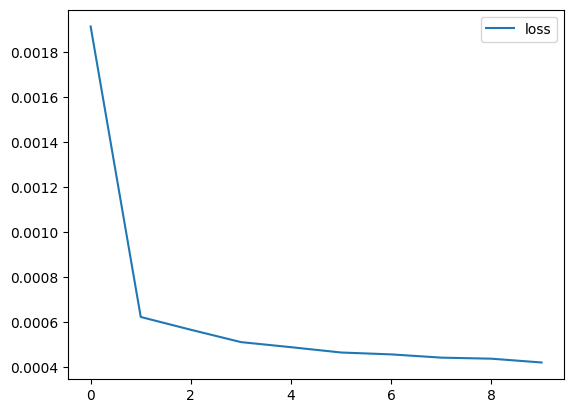

In [47]:
lstm_losses = pd.DataFrame(lstm_model.history.history)
lstm_losses.plot()

##### Save the model

In [48]:
lstm_model.save('/content/gdrive/My Drive/lstm.pt')

##### Predict 1-year stock price

In [154]:
test_predictions = []

lstm_eval_batch = scaled_train[-seq_length:]
current_batch = lstm_eval_batch.reshape((1, seq_length, 5))

for i in range(len(test)):
    current_pred = lstm_model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 34ms/step


In [155]:
print("MSE: ", mean_squared_error(scaled_test, test_predictions))
print("MAE: ", mean_absolute_error(scaled_test, test_predictions))

MSE:  0.7091427172659716
MAE:  0.7318261723521629


### Model 4: GRU

In [49]:
'''Try to get the best performance using GRU layers'''
gru_model = Sequential()

gru_model.add(GRU(30, input_shape=(seq_length, 5)))

gru_model.add(Dense(5))

gru_model.compile(optimizer = 'adam', loss='mse')

In [50]:
gru_model.fit(generator, epochs=10)

Epoch 1/10
2718/2718 [==============================] - 58s 20ms/step - loss: 0.0014
Epoch 2/10
2718/2718 [==============================] - 55s 20ms/step - loss: 5.7279e-04
Epoch 3/10
2718/2718 [==============================] - 58s 21ms/step - loss: 5.1749e-04
Epoch 4/10
2718/2718 [==============================] - 56s 20ms/step - loss: 4.8516e-04
Epoch 5/10
2718/2718 [==============================] - 51s 19ms/step - loss: 4.6015e-04
Epoch 6/10
2718/2718 [==============================] - 52s 19ms/step - loss: 4.5059e-04
Epoch 7/10
2718/2718 [==============================] - 55s 20ms/step - loss: 4.3924e-04
Epoch 8/10
2718/2718 [==============================] - 55s 20ms/step - loss: 4.2777e-04
Epoch 9/10
2718/2718 [==============================] - 53s 19ms/step - loss: 4.2052e-04
Epoch 10/10
2718/2718 [==============================] - 52s 19ms/step - loss: 4.2088e-04


##### Visualize train performance

<Axes: >

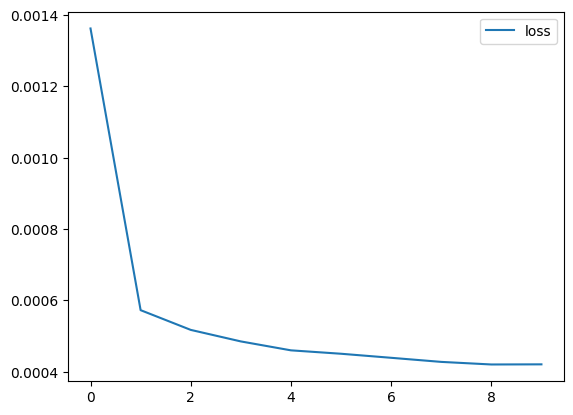

In [51]:
gru_losses = pd.DataFrame(gru_model.history.history)
gru_losses.plot()

##### Save the model

In [52]:
gru_model.save('/content/gdrive/My Drive/gru.pt')

##### Predict 1-year stock price

In [152]:
# predict one year
test_predictions = []

gru_eval_batch = scaled_train[-seq_length:]
current_batch = gru_eval_batch.reshape((1, seq_length, 5))

for i in range(len(test)):
    current_pred = gru_model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 27ms/step


# Report your MSE Result on the test set here

For your information, the performance on my end are: (They may be better on your models)


In [153]:
print("MSE: ", mean_squared_error(scaled_test, test_predictions))
print("MAE: ", mean_absolute_error(scaled_test, test_predictions))

MSE:  1.1451481685408424
MAE:  0.8836773241581886


# Good Job!